In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
%matplotlib inline

# Part 1 Camera Calibration
This part loads all the calibration images and uses OpenCV's camera calibration functions to calculate a calibration matrix. This section borrows heavily from the camera calibration tutorial in the camera calibration module.

There are 20 calibration images.


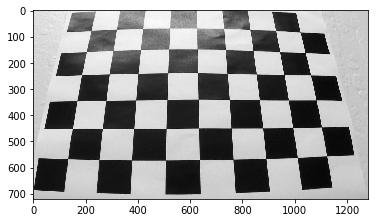

In [2]:
# The calibration images have 9x6 internal corners
nx = 9
ny = 6
fnames = glob.glob('./camera_cal/calibration*.jpg')
print "There are "+ str(len(fnames))+" calibration images."
# Arrays to store the image points and object points from all images
img_points = []
obj_points = []

# Prepare object points to be in a grid
ob_points = np.zeros((6*9,3), np.float32)
ob_points[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)
test_img_num = 2
test_img = cv2.imread(fnames[test_img_num])
gray_test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_test_img, cmap='gray')

In [3]:
# Iterate through all images and concatenate detected corners to img_points
for fname in fnames:
    image = cv2.imread(fname) # Read in the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # Convert to grayscale
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)  # Find the chessboard corners
    if ret == True:
        img_points.append(corners)
        obj_points.append(ob_points)
        img = cv2.drawChessboardCorners(gray, (9,6), corners, ret)

In [4]:
# Get the calibration parameters
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray_test_img.shape[::-1], None, None)

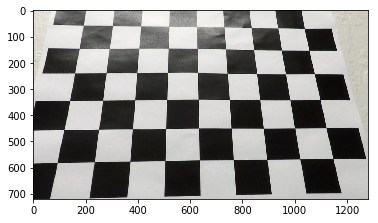

In [5]:
# Try undistorting the test image
test_dst = cv2.undistort(test_img, mtx, dist, None, mtx)
plt.imshow(cv2.cvtColor(test_dst, cv2.COLOR_BGR2RGB))

The above section should give us the camera calibration matrices needed for undistorting all the images

In [ ]:
# Part 2